#### Download the database file.


In [49]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-02-22 18:08:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  66.2MB/s    in 3.0s    

2025-02-22 18:08:18 (66.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



In [50]:
!pip install pandas

In [51]:
!pip install matplotlib

In [52]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [53]:
conn = sqlite3.connect('survey-data.sqlite')

### Plots

#### 1. Histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [ ]:
QUERY = "SELECT YearsCodePro FROM main"

# Fetch the data into a DataFrame
df_YearsCode = pd.read_sql_query(QUERY, conn)

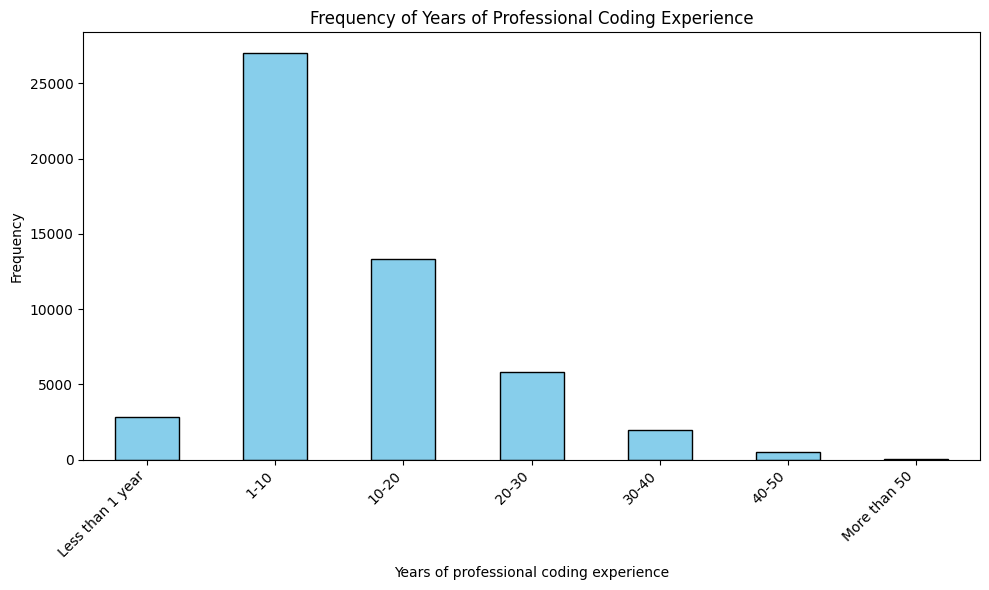

In [56]:
# Clean the data
# Replace non-numeric values with appropriate numeric values
df_YearsCode['YearsCodePro'] = df_YearsCode['YearsCodePro'].replace({
    'Less than 1 year': 0.5,  # Map "Less than 1 year" to 0.5
    'More than 50 years': 55   # Map "More than 50 years" to 55
})

# Convert YearsCodePro to numeric (in case it's stored as strings)
df_YearsCode['YearsCodePro'] = pd.to_numeric(df_YearsCode['YearsCodePro'], errors='coerce')

# Drop rows with NaN or invalid values
df_YearsCode = df_YearsCode.dropna(subset=['YearsCodePro'])

# Define bins and labels
bins = [0, 1, 10, 20, 30, 40, 50, 60]  # Custom bins
bin_labels = ['Less than 1 year', '1-10', '10-20', '20-30', '30-40', '40-50', 'More than 50']

# Step 4: Bin the YearsCodePro data
df_YearsCode['YearsCodePro_binned'] = pd.cut(df_YearsCode['YearsCodePro'], bins=bins, labels=bin_labels, right=False)

# Step 5: Plot the histogram
plt.figure(figsize=(10, 6))
df_YearsCode['YearsCodePro_binned'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Years of professional coding experience')
plt.ylabel('Frequency')
plt.title('Frequency of Years of Professional Coding Experience')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#### 2. Histograms to compare the count of CompTotal across different Age groups.


In [ ]:
QUERY = """
SELECT Age,  COUNT(CompTotal) as Compcount
FROM main
GROUP BY Age
"""
# Fetch the data into a DataFrame
df_Comp_age = pd.read_sql_query(QUERY, conn)
print(df_Comp_age)


                  Age  Compcount
0     18-24 years old       4636
1     25-34 years old      14657
2     35-44 years old       9352
3     45-54 years old       3516
4     55-64 years old       1279
5   65 years or older        196
6   Prefer not to say         14
7  Under 18 years old         90


In [ ]:
import numpy as np

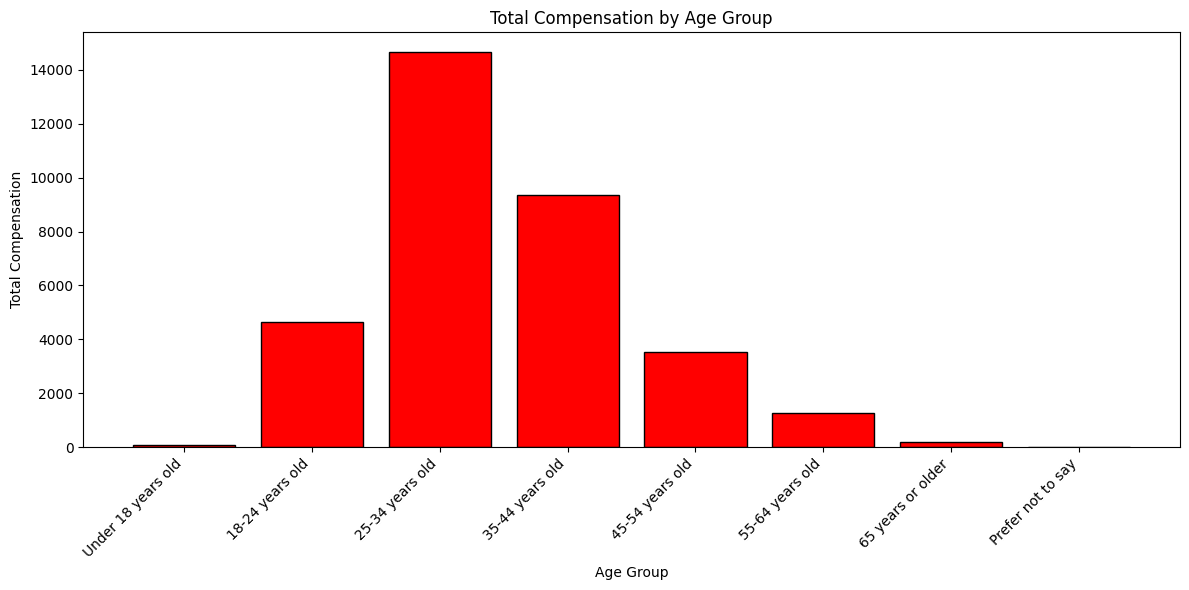

In [ ]:
df_Comp_age = df_Comp_age.sort_values(by='Age', key=lambda x: x == 'Under 18 years old', ascending=False)

# Plot the grouped bar plot
plt.figure(figsize=(12, 6))

# Define the positions for the bars
x = np.arange(len(df_Comp_age['Age']))  # x-axis positions for age groups

# Plot the bars
plt.bar(
    x,                              # x-axis positions
    df_Comp_age['Compcount'],       # y-axis values (counts)
    color= 'red',  # Assign unique colors to each age group
    edgecolor='black'               # Edge color of the bars
)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.title('Total Compensation by Age Group')

# Set x-axis ticks and labels
plt.xticks(x, df_Comp_age['Age'], rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#### 3. Histograms to show the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [ ]:
QUERY = """
SELECT Age,  COUNT(TimeSearching) as Timesearchcount
FROM main
GROUP BY Age
"""
# Fetch the data into a DataFrame
df_time_age = pd.read_sql_query(QUERY, conn)
print(df_time_age)

                  Age  Timesearchcount
0     18-24 years old             4175
1     25-34 years old            12603
2     35-44 years old             7960
3     45-54 years old             2955
4     55-64 years old              980
5   65 years or older              118
6   Prefer not to say               48
7  Under 18 years old               72


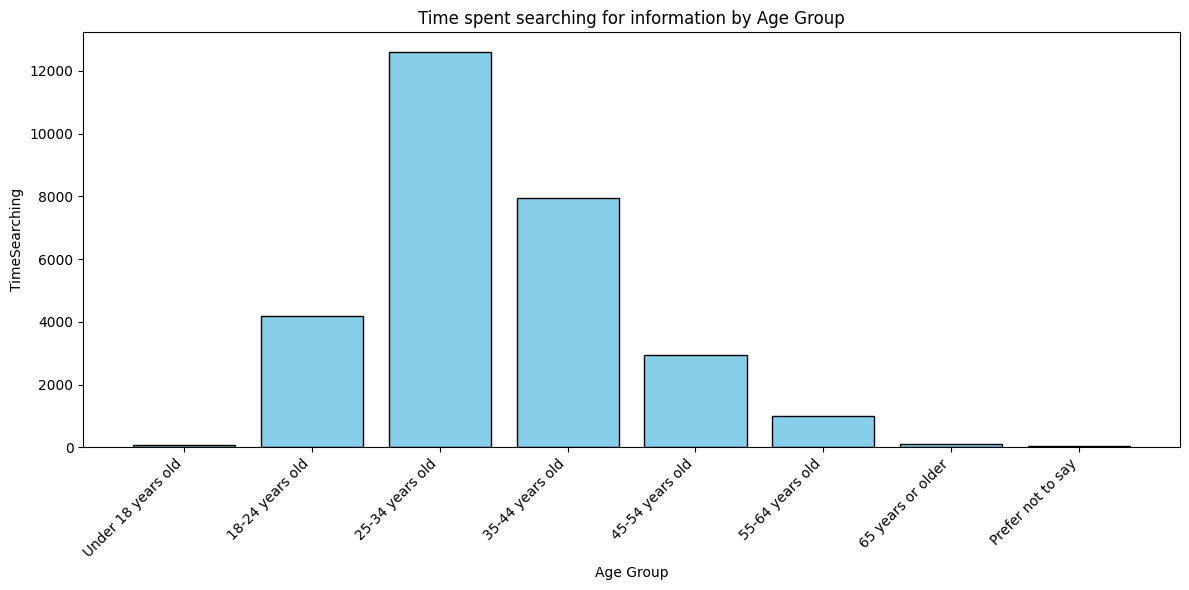

In [ ]:
df_time_age = df_time_age.sort_values(by='Age', key=lambda x: x == 'Under 18 years old', ascending=False)

# Step 2: Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(
    df_time_age['Age'],              # x-axis: Age groups
    df_time_age['Timesearchcount'],  # y-axis: Counts
    color='skyblue',                 # Bar color
    edgecolor='black'                # Bar edge color
)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('TimeSearching')
plt.title('Time spent searching for information by Age Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#### 4. Visualizing the most desired databases for future learning using a histogram of the top 5 databases.


In [ ]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
# Fetch the data into a DataFrame
df_desired_db = pd.read_sql_query(QUERY, conn)
print(df_desired_db)

           DatabaseWantToWorkWith
0                            None
1                      PostgreSQL
2      Firebase Realtime Database
3        MongoDB;MySQL;PostgreSQL
4               PostgreSQL;SQLite
...                           ...
65432                        None
65433                        None
65434                        None
65435           PostgreSQL;SQLite
65436    MongoDB;MySQL;PostgreSQL

[65437 rows x 1 columns]


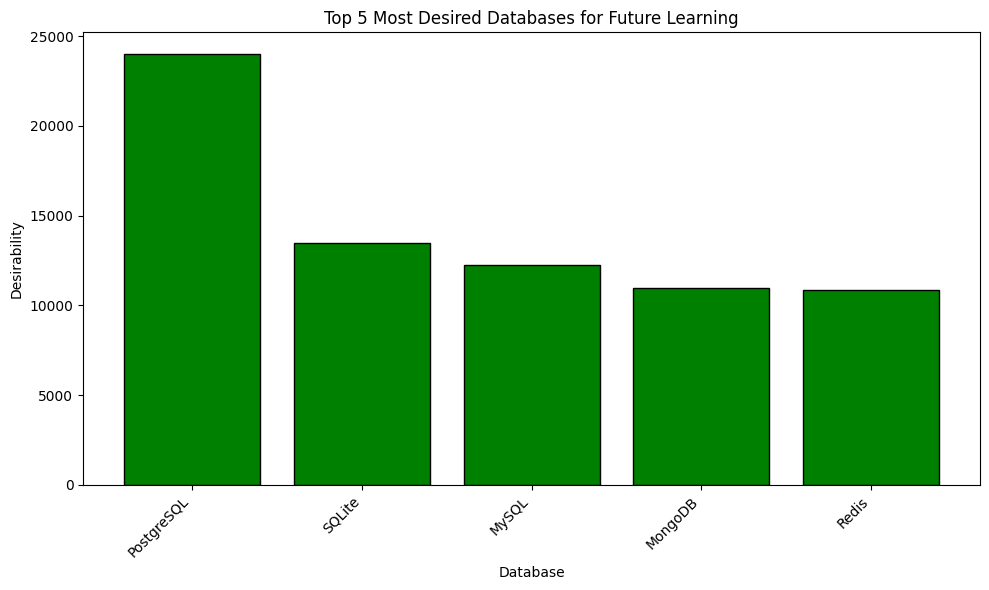

In [ ]:
# Split the strings by ';' and explode into individual rows
all_databases = df_desired_db['DatabaseWantToWorkWith'].str.split(';').explode()

# Count the occurrences of each database
database_counts = all_databases.value_counts()

# Filter out 'None' and get the top 5 databases
database_counts = database_counts[database_counts.index != 'None'].head(5)

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    database_counts.index,  # x-axis: Database names
    database_counts.values, # y-axis: Count of desired databases
    color='green',        # Bar color
    edgecolor='black'       # Bar edge color
)

# Add labels and title
plt.xlabel('Database')
plt.ylabel('Desirability')
plt.title('Top 5 Most Desired Databases for Future Learning')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#### 5. Histogram to visualize the distribution of preferred work arrangements (`remote work`).


In [ ]:
QUERY = """
SELECT RemoteWork, COUNT(RemoteWork) as worktype
FROM main
GROUP BY RemoteWork
"""
# Step 2: Fetch the data into a DataFrame
df_worktype = pd.read_sql_query(QUERY, conn)
print(df_worktype)

                             RemoteWork  worktype
0                                  None         0
1  Hybrid (some remote, some in-person)     23015
2                             In-person     10960
3                                Remote     20831


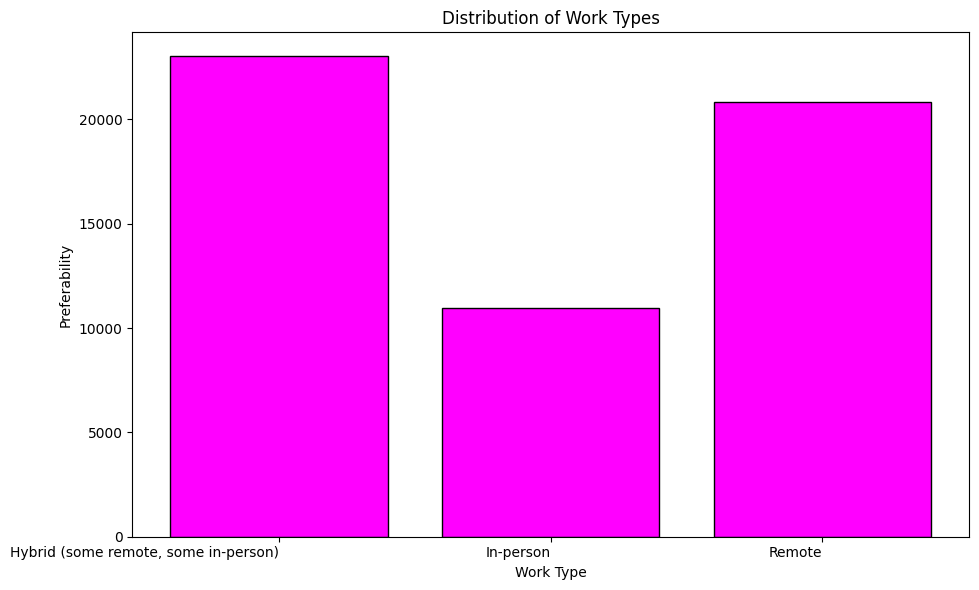

In [ ]:
# Filter out rows where worktype is 0
df_worktype_filtered = df_worktype[df_worktype['worktype'] != 0]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    df_worktype_filtered['RemoteWork'],  # x-axis: Work types
    df_worktype_filtered['worktype'],    # y-axis: Counts
    color='magenta',                     # Bar color
    edgecolor='black'                    # Bar edge color
)

# Add labels and title
plt.xlabel('Work Type')
plt.ylabel('Preferability')
plt.title('Distribution of Work Types')

# Step 4: Rotate x-axis labels for better readability
plt.xticks(ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#### 6. Histogram for total compensation (`CompTotal`) for 45-54 and 55-64 to analyze compensation among mid-career respondents.


In [ ]:
QUERY = """
SELECT Age,  COUNT(CompTotal) as Compcount
FROM main
GROUP BY Age
"""
# Fetch the data into a DataFrame
df_Comp_age = pd.read_sql_query(QUERY, conn)
print(df_Comp_age)


                  Age  Compcount
0     18-24 years old       4636
1     25-34 years old      14657
2     35-44 years old       9352
3     45-54 years old       3516
4     55-64 years old       1279
5   65 years or older        196
6   Prefer not to say         14
7  Under 18 years old         90


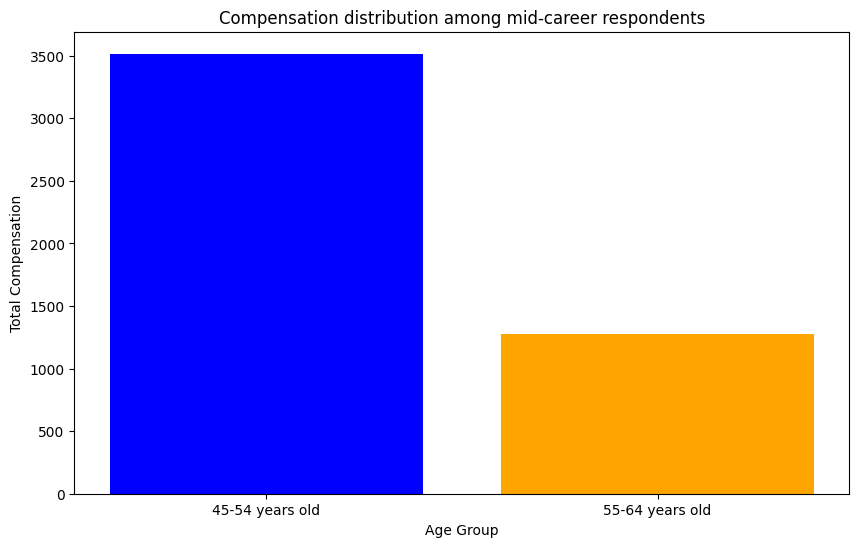

In [55]:
# Filter for the two age groups: 45-54 and 55-64
filtered_df = df_Comp_age[df_Comp_age['Age'].isin(['45-54 years old', '55-64 years old'])]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Age'], filtered_df['Compcount'], color=['blue', 'orange'])
plt.title('Compensation distribution among mid-career respondents')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.show()

#### 7. Histogram for analysin job satisfaction (`JobSat`) scores based on respondents' years of professional coding experience.


In [ ]:
QUERY = """
SELECT
    CASE
        WHEN YearsCodePro = 'Less than 1 year' THEN '0-1 years'
        WHEN YearsCodePro = 'More than 50 years' THEN '50+ years'
        WHEN YearsCodePro IS NULL THEN 'Unknown'
        WHEN CAST(YearsCodePro AS INTEGER) BETWEEN 1 AND 4 THEN '1-4 years'
        WHEN CAST(YearsCodePro AS INTEGER) BETWEEN 5 AND 9 THEN '5-9 years'
        WHEN CAST(YearsCodePro AS INTEGER) BETWEEN 10 AND 14 THEN '10-14 years'
        WHEN CAST(YearsCodePro AS INTEGER) BETWEEN 15 AND 19 THEN '15-19 years'
        WHEN CAST(YearsCodePro AS INTEGER) BETWEEN 20 AND 24 THEN '20-24 years'
        WHEN CAST(YearsCodePro AS INTEGER) BETWEEN 25 AND 29 THEN '25-29 years'
        WHEN CAST(YearsCodePro AS INTEGER) BETWEEN 30 AND 34 THEN '30-34 years'
        WHEN CAST(YearsCodePro AS INTEGER) BETWEEN 35 AND 39 THEN '35-39 years'
        WHEN CAST(YearsCodePro AS INTEGER) BETWEEN 40 AND 44 THEN '40-44 years'
        WHEN CAST(YearsCodePro AS INTEGER) BETWEEN 45 AND 49 THEN '45-49 years'
        ELSE 'Unknown'
    END AS YearsCodeProGroup,
    AVG(JobSat) AS AvgJobSat
FROM main
GROUP BY YearsCodeProGroup
ORDER BY YearsCodeProGroup
"""
# Fetch the data into a DataFrame
df_jobsat_exp = pd.read_sql_query(QUERY, conn)

# Display the DataFrame
print(df_jobsat_exp)

   YearsCodeProGroup  AvgJobSat
0          0-1 years   6.726923
1          1-4 years   6.674896
2        10-14 years   7.038320
3        15-19 years   7.162134
4        20-24 years   7.192046
5        25-29 years   7.344715
6        30-34 years   7.338736
7        35-39 years   7.608974
8        40-44 years   7.539394
9        45-49 years   7.533333
10         5-9 years   6.902872
11         50+ years   8.875000
12           Unknown   6.391192


In [ ]:
# Filter out rows where YearsCodeProGroup is 'Unknown'
df_sorted = df_jobsat_exp[df_jobsat_exp['YearsCodeProGroup'] != 'Unknown']

# Extract the numeric part of YearsCodeProGroup for sorting
df_sorted['SortKey'] = df_sorted['YearsCodeProGroup'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by the numeric key
df_sorted = df_sorted.sort_values('SortKey')

# Drop the temporary SortKey column
df_sorted = df_sorted.drop(columns=['SortKey'])

# Display the filtered and sorted DataFrame
print(df_sorted)

   YearsCodeProGroup  AvgJobSat
0          0-1 years   6.726923
1          1-4 years   6.674896
10         5-9 years   6.902872
2        10-14 years   7.038320
3        15-19 years   7.162134
4        20-24 years   7.192046
5        25-29 years   7.344715
6        30-34 years   7.338736
7        35-39 years   7.608974
8        40-44 years   7.539394
9        45-49 years   7.533333
11         50+ years   8.875000


<ipython-input-45-402a180f9490>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['SortKey'] = df_sorted['YearsCodeProGroup'].str.extract('(\d+)').astype(int)


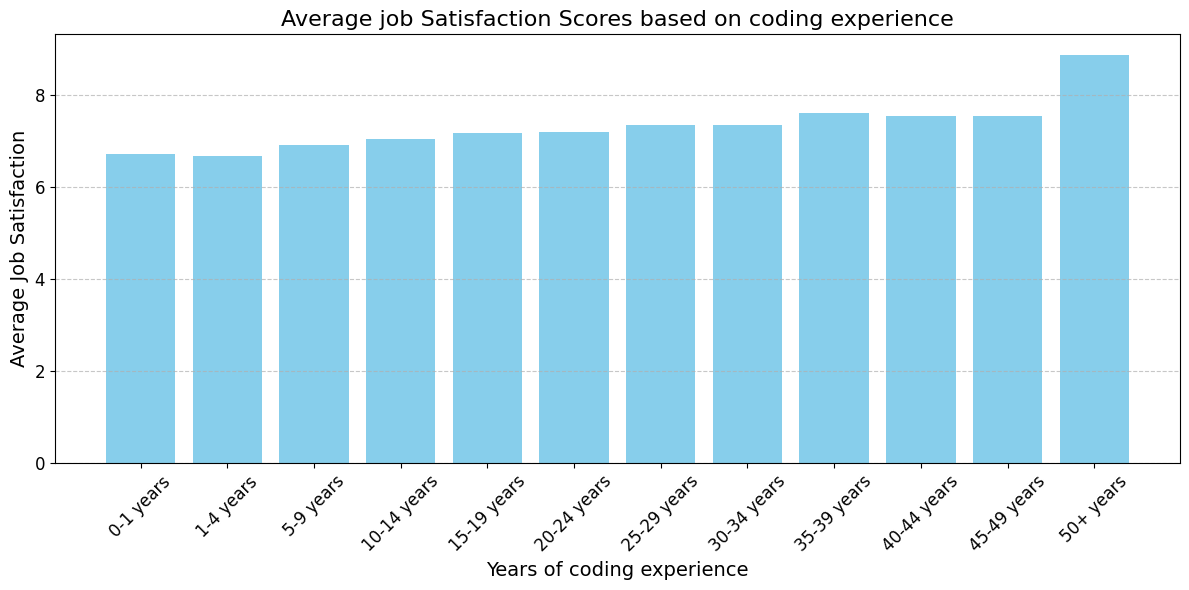

In [54]:
# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['YearsCodeProGroup'], df_sorted['AvgJobSat'], color='skyblue')

plt.title('Average job Satisfaction Scores based on coding experience', fontsize=16)
plt.xlabel('Years of coding experience', fontsize=14)
plt.ylabel('Average Job Satisfaction', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
### Final step: Close the database connection
conn.close()